In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

df = pd.read_parquet("S:/COM/Human_Resources/01.Engineering_Tech_School/02.Internal/5 - Aprendizes/2 - Desenvolvimento de Sistemas/6 - Soluções Digitais 2025/Anna Guerra/IA/AI-Bosch/02 NY Taxi/yellow_tripdata_2025-07.parquet")

In [2]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee',
       'cbd_congestion_fee'],
      dtype='object')

In [3]:
df = df[[
    'VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
      'PULocationID', 'DOLocationID', 'payment_type', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'total_amount']]
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,mta_tax,tip_amount,tolls_amount,total_amount
0,1,2025-07-01 00:29:37,2025-07-01 00:45:30,1.0,7.30,1.0,N,138,74,1,7.75,0.5,9.00,6.94,54.79
1,1,2025-07-01 00:23:28,2025-07-01 01:07:44,1.0,17.70,2.0,N,132,142,1,4.25,0.5,5.00,0.00,80.75
2,2,2025-07-01 00:53:50,2025-07-01 01:27:12,1.0,9.98,1.0,N,138,48,1,6.00,0.5,10.87,0.00,66.97
3,2,2025-07-01 00:58:49,2025-07-01 01:15:55,1.0,10.27,1.0,N,138,229,1,6.00,0.5,14.10,6.94,72.24
4,2,2025-07-01 00:09:22,2025-07-01 00:23:54,1.0,2.94,1.0,N,211,97,1,1.00,0.5,3.00,0.00,25.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3898958,2,2025-07-31 23:43:43,2025-07-31 23:47:49,NaN,0.64,NaN,None,100,170,0,0.00,0.5,0.00,0.00,11.14
3898959,2,2025-07-31 23:05:39,2025-07-31 23:34:07,NaN,6.19,NaN,None,249,265,0,0.00,0.0,0.00,14.06,10.00
3898960,2,2025-07-31 23:08:32,2025-07-31 23:34:06,NaN,7.80,NaN,None,151,79,0,0.00,0.5,0.00,0.00,37.28
3898961,2,2025-07-31 23:13:56,2025-07-31 23:25:09,NaN,2.09,NaN,None,148,170,0,0.00,0.5,0.00,0.00,16.92


In [4]:
column = 'VendorID'
df[column].unique()



array([1, 2, 7, 6])

In [5]:
column = 'tpep_pickup_datetime'
df[column].unique()

<DatetimeArray>
['2025-07-01 00:29:37', '2025-07-01 00:23:28', '2025-07-01 00:53:50',
 '2025-07-01 00:58:49', '2025-07-01 00:09:22', '2025-07-01 00:39:14',
 '2025-07-01 00:15:26', '2025-07-01 00:40:58', '2025-07-01 00:28:12',
 '2025-07-01 00:38:17',
 ...
 '2025-07-31 23:55:58', '2025-07-31 23:44:41', '2025-07-31 23:52:27',
 '2025-07-31 23:33:48', '2025-07-31 23:37:41', '2025-07-31 23:30:12',
 '2025-07-31 23:48:12', '2025-07-31 23:37:44', '2025-07-31 23:52:35',
 '2025-07-31 23:13:56']
Length: 1810838, dtype: datetime64[us]

In [6]:
column = 'tpep_dropoff_datetime'
df[column].unique()

<DatetimeArray>
['2025-07-01 00:45:30', '2025-07-01 01:07:44', '2025-07-01 01:27:12',
 '2025-07-01 01:15:55', '2025-07-01 00:23:54', '2025-07-01 00:55:21',
 '2025-07-01 00:29:39', '2025-07-01 00:44:15', '2025-07-01 00:39:49',
 '2025-07-01 00:55:44',
 ...
 '2025-07-31 23:19:37', '2025-07-31 23:47:04', '2025-07-31 23:43:04',
 '2025-07-31 23:56:58', '2025-07-31 23:37:06', '2025-08-01 00:01:10',
 '2025-07-31 23:49:35', '2025-07-31 23:54:26', '2025-08-01 00:13:13',
 '2025-08-01 00:05:44']
Length: 1810965, dtype: datetime64[us]

In [7]:
column = 'passenger_count'
df[column].unique()

df[column] = df[column].fillna(1)
df[column] = df[column].replace(0,1)
    
df[column].unique()

array([1., 2., 3., 4., 5., 6., 8., 9., 7.])

In [8]:
column = 'trip_distance'
km = 1.609344
df[column] = df[column] * km
df = df[df[column] < 200]
df[column]

0          11.748211
1          28.485389
2          16.061253
3          16.527963
4           4.731471
             ...    
3898958     1.029980
3898959     9.961839
3898960    12.552883
3898961     3.363529
3898962     4.634911
Name: trip_distance, Length: 3898734, dtype: float64

In [9]:
column = 'RatecodeID'
df[column] = df[column].fillna(99)
df[column].unique()


C:\Users\disrct\AppData\Local\Temp\ipykernel_24908\3061646619.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].fillna(99)


array([ 1.,  2.,  4.,  5., 99.,  3.,  6.])

In [10]:
df.loc[df['store_and_fwd_flag'].isna(), 'store_and_fwd_flag'] = "N"
df['store_and_fwd_flag'].unique()

array(['N', 'Y'], dtype=object)

In [11]:
column = 'PULocationID'
df[column].unique()

array([138, 132, 211,  79, 140, 114, 233, 229, 237, 234, 230,  48, 163,
       170, 161, 142, 148, 158,  41, 107, 186, 141,  90, 164, 249, 137,
       263, 239, 261,  70, 113, 162,  43, 231, 224,  68, 144,  50, 100,
       246,  36, 191, 189, 168, 236, 209, 125,  87, 238,  14,  13, 244,
       143,  25, 129,  97,   4,  42,  74, 219, 185, 262,  24,  75,  45,
       147,  88, 264, 265, 188, 226, 166, 207, 260,  93, 151,  10,  83,
        55,  28, 145, 127, 155, 206,   7,  52, 146, 193, 216, 181, 152,
        62,  80, 179, 223, 215, 256,  16, 130, 156, 116,  17,  85,  92,
       243,  95,  82,  19, 203, 232, 194,  18, 160, 205,  72,  71,  56,
        51, 259, 112, 119, 242, 157,  76,   3,  61,  39, 197,  89,  35,
       254,  40, 212, 213, 218,  11,  94, 174,  38,  26,  47,   1,  86,
       117, 108, 122,  91, 202, 169,  15, 225, 201,  54,  69, 149, 131,
        49, 198, 177,  64,  22,  32, 240, 258, 208,  60, 195,  67, 165,
       139, 210, 150,  77,  78, 247, 124,  65, 196,  63, 133,  3

In [12]:
column = 'DOLocationID'
df[column].unique()

array([ 74, 142,  48, 229,  97, 155, 263, 262,  50, 197, 233, 140,  65,
       265, 163, 148, 125, 186, 230, 239,  90,   7, 114, 256, 107, 143,
       209, 255, 162,   9, 137,   4, 225, 113, 166, 161, 132,  41, 144,
        73, 170,  79,  82, 249, 158, 151,  43, 211, 127,  16,  56, 159,
       116,  45, 237, 246, 164,  75, 236, 252,  42, 134, 238,  68,  21,
        49,  14, 129, 234, 141,  87, 145, 228, 117, 191, 189,  92,  89,
        80, 231, 100,  66, 223,  40,  61, 232, 168, 216, 177, 195, 102,
       146, 150, 221,  54, 261,  24, 190,  36,  37,  71, 244, 220,  52,
       138, 181, 260,  10,  72,  29, 179,  17, 226,  33, 112,  83, 254,
        60, 188,  95, 119, 217, 106, 219,  28, 224, 157, 198, 174, 200,
        34,  25, 202,  86, 139,  91,  88,  70,  12, 171, 257,  18, 153,
        64,  76, 147, 101, 130, 173, 247, 264, 203,  51,  35,  53, 251,
       152, 149,  38,  47, 124,  77,  93, 196,  13,  15,  98,   1, 180,
       205, 250,  26, 218, 182, 215,  62,  39,  55, 258, 243, 21

In [13]:
column = 'payment_type'
df[column].unique()


array([1, 3, 2, 4, 0], dtype=int64)

In [14]:
column = 'extra'
df[column].unique()


array([ 7.750e+00,  4.250e+00,  6.000e+00,  1.000e+00,  0.000e+00,
        1.025e+01, -6.000e+00,  5.000e+00,  2.750e+00, -1.000e+00,
        3.500e+00,  3.250e+00,  2.500e+00,  1.750e+00,  1.100e+01,
        7.500e-01,  6.750e+00,  9.250e+00,  8.500e+00,  2.500e-01,
        5.750e+00,  1.000e+01,  7.500e+00,  8.250e+00, -5.000e+00,
        1.250e+01,  1.175e+01,  1.075e+01, -2.500e+00, -7.500e+00,
       -7.500e-01,  3.950e+00,  5.250e+00,  1.500e+01,  5.000e-01,
       -2.500e-01,  2.000e-02,  8.000e-02, -3.000e-02,  3.000e-02,
        3.300e-01, -1.000e-02,  1.000e-02, -3.250e+00, -1.750e+00,
       -4.250e+00,  6.000e-02,  7.900e-01,  1.000e-01,  1.325e+01,
        3.200e-01,  2.600e-01,  3.200e+00,  1.030e+00,  1.010e+00,
        1.020e+00,  4.000e-02,  6.500e+00,  2.000e+00,  4.000e+00,
        5.000e-02, -2.000e-02,  2.800e-01,  1.070e+00,  3.500e-01,
        7.000e-02,  3.100e-01,  1.180e+00,  1.050e+00,  9.000e-02,
        7.000e+00])

In [15]:
column = 'mta_tax'
df = df[df[column] > 0.00]
df[column].value_counts()


mta_tax
0.50       3771195
1.00           172
10.50            7
4.75             6
3.25             2
6.50             1
5243.38          1
4.50             1
3.75             1
Name: count, dtype: int64

In [16]:
column = 'tip_amount'
df[column].value_counts()

tip_amount
0.00     1586588
2.00      148823
1.00      110433
3.00       63827
5.00       44065
          ...   
34.25          1
28.10          1
44.05          1
32.21          1
38.26          1
Name: count, Length: 3765, dtype: int64

In [17]:
column = 'tolls_amount'
df[column].value_counts()


tolls_amount
0.00     3526369
6.94      233754
3.18        3384
13.88       1681
5.20        1191
          ...   
22.05          1
10.09          1
22.74          1
85.00          1
17.47          1
Name: count, Length: 485, dtype: int64

In [18]:
column = 'total_amount'
df[column].value_counts()

total_amount
17.70     23346
21.90     19908
19.38     18882
21.06     18506
3.00      18361
          ...  
120.16        1
159.29        1
157.69        1
176.35        1
165.39        1
Name: count, Length: 15342, dtype: int64

In [19]:
df['Duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime'] 

df = df[(df['Duration'] >= pd.Timedelta(minutes=1)) &
        (df['Duration'] <= pd.Timedelta(hours=3))]

df['Duration'].describe()


count                   3691597
mean     0 days 00:17:03.489001
std      0 days 00:12:52.260156
min             0 days 00:01:00
25%             0 days 00:08:33
50%             0 days 00:13:48
75%             0 days 00:21:29
max             0 days 02:59:49
Name: Duration, dtype: object

In [20]:
df['Duration']

0         0 days 00:15:53
1         0 days 00:44:16
2         0 days 00:33:22
3         0 days 00:17:06
4         0 days 00:14:32
                ...      
3898957   0 days 00:11:05
3898958   0 days 00:04:06
3898960   0 days 00:25:34
3898961   0 days 00:11:13
3898962   0 days 00:11:35
Name: Duration, Length: 3691597, dtype: timedelta64[us]

In [21]:
df['trip_distance']

0          11.748211
1          28.485389
2          16.061253
3          16.527963
4           4.731471
             ...    
3898957     2.687604
3898958     1.029980
3898960    12.552883
3898961     3.363529
3898962     4.634911
Name: trip_distance, Length: 3691597, dtype: float64

In [25]:
df['payment_type'].describe()

count    3.691597e+06
mean     8.593021e-01
std      6.955833e-01
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      4.000000e+00
Name: payment_type, dtype: float64

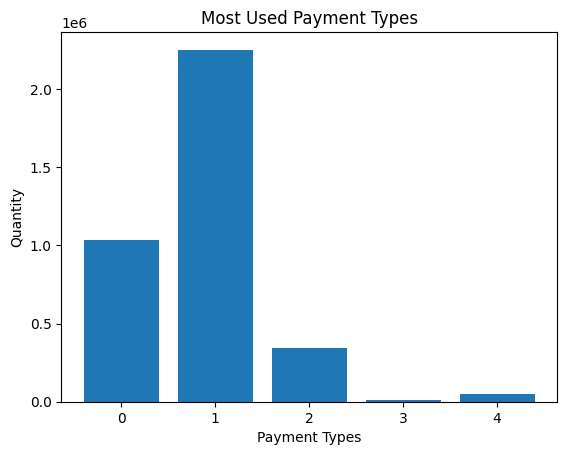

In [33]:
category  = df['payment_type'].value_counts()

plt.bar(category.index, category.values)

plt.title('Most Used Payment Types')
plt.xlabel('Payment Types')
plt.ylabel('Quantity')

plt.show()

In [69]:
df['Hour'].describe()

count    3.691597e+06
mean     2.843025e-01
std      2.145167e-01
min      1.666667e-02
25%      1.425000e-01
50%      2.300000e-01
75%      3.580556e-01
max      2.996944e+00
Name: Hour, dtype: float64

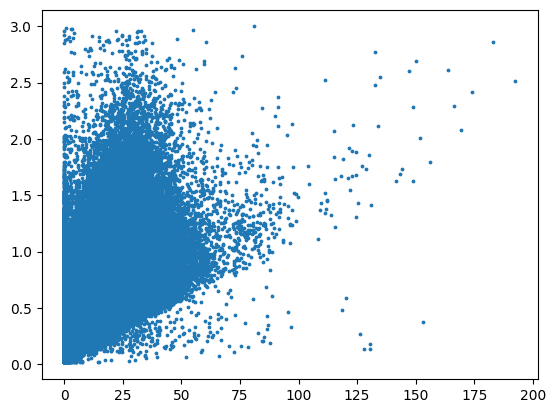

In [71]:
df['Hour'] = df['Duration'].dt.total_seconds() / 3600

df['Hour'].describe()

x = df['trip_distance']
y = df['Hour']

plt.scatter(x, y, s = 3)
plt.show()


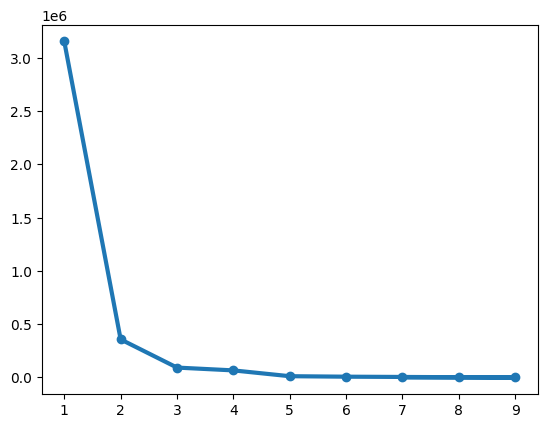

In [85]:
category = df['passenger_count'].value_counts()
plt.plot(category, marker = 'o', markersize = 6, lw = 3)

TypeError: the dtypes of parameters x (object) and width (float64) are incompatible

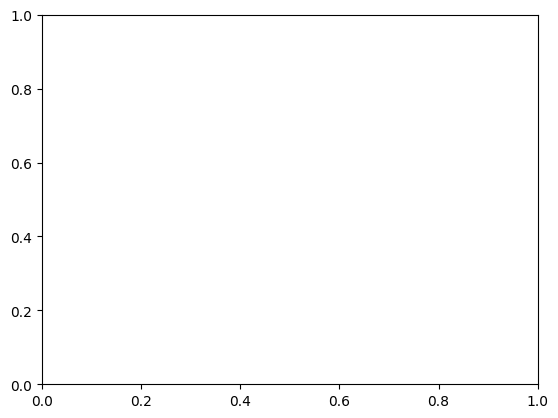

In [ ]:
category = 